# Linear and logistic regression

## 1. Business Understanding

The goal of this project is to predict house prices based on various features such as house age, distance to the nearest MRT station, number of convenience stores in the vicinity, latitude location, longitude location, and transaction date. The dataset contains information on house prices in Taiwan, and the target variable is the house price of unit area.

Requirements: 
1. Predict house prices based on the given features
2. Classify properties as either above or below the average price
3. Identify the most important features that influence house prices
4. Deploy the models for real-time predictions
5. Communicate results through performance reports and alerts

The project will involve building two models:
1. Linear regression model to predict house prices
2. Logistic regression model to classify properties as above or below the average price

Expected outcome:
The models will provide accurate predictions and classifications of house prices based on the given features. The most important features that influence house prices will be identified, and the models will be deployed for real-time predictions. Results will be communicated through performance reports and alerts for large price changes.

The linear regression model will predict continuous house prices, while the logistic regression model will classify properties as either above or below the average price.
The logistic regression model will be evaluated based on the accuracy score and confusion matrix, while the linear regression model will be evaluated based on the mean absolute error.

## 2. Data Understanding

The dataset contains information on house prices in Taiwan. It was obtained from  the UCI Machine Learning Repository.
URL: https://archive.ics.uci.edu/dataset/477/real+estate+valuation+data+set

The dataset has 414 instances and 6 features. There are no missing values in the dataset.

Features (X):

X1: House age
X2: Distance to nearest MRT (Mass Rapid Transit) station
X3: Number of convenience stores in the vicinity
X4: Latitude location
X5: Longitude location
X6: Transaction date

Target Variable (y):

House price of unit area

The dataset has been transformed into a binary classification problem by:

Calculating the average house price per unit area
Creating a binary target where:

1 = Price is above or equal to average
0 = Price is below average

## 3. Data Preparation

Data preparation steps include: 
1. The dataset is loaded into a pandas dataframe
2. The target variable is transformed into a binary classification problem
3. The data is split into training and testing sets

In [76]:
import pandas as pd
from ucimlrepo import fetch_ucirepo

# fetch the dataset
real_estate_valuation = fetch_ucirepo(id=477) 

In [77]:
# data (as pandas dataframes) 
X = pd.DataFrame(real_estate_valuation.data.features)
y = pd.DataFrame(real_estate_valuation.data.targets)

## 4. Modeling
Linear and logistic regressions will have separate models.
### 4.1 Linear regression
The dataset will be split into training and testing sets.

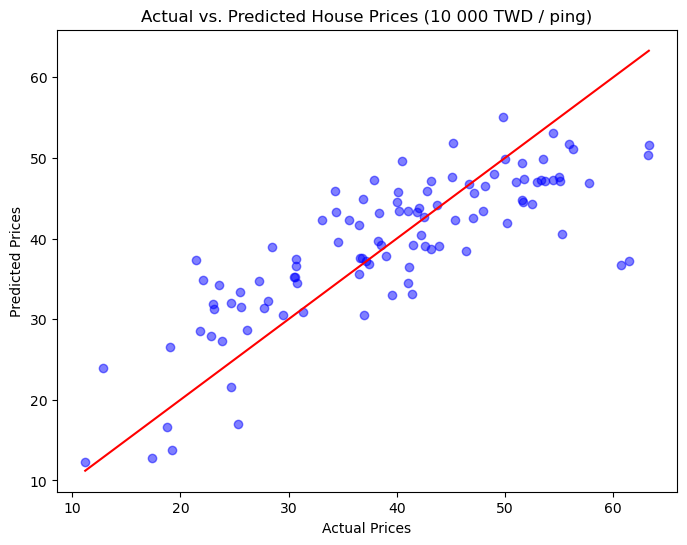

In [78]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=20)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color="blue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')  # Ideal 1:1 line
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs. Predicted House Prices (10 000 TWD / ping)")
plt.show()

This graph shows the relationship between the predicted and actual prices. If a dot is close to the line, the prediction is accurate, while dots further away indicate inaccuracy.
### 4.2 Logistic regression

In [84]:
import warnings
from sklearn.exceptions import DataConversionWarning

warnings.filterwarnings(action='ignore', category=DataConversionWarning)

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler


# Calculate the average house price of unit area
average = y['Y house price of unit area'].mean()

# Map values to 0 and 1 based on the average
y['Y house price of unit area'] = y['Y house price of unit area'].apply(lambda x: 1 if x >= average else 0)

In logistic regression, house prices are divided based on whether they are above or below the average, using the given map values. The map values of 1 and 0 are used in confusion matrix analysis.

In [85]:
# Standardize the input variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create and train the logistic regression model
reg = LogisticRegression(solver='lbfgs')
reg.fit(X_scaled, y['Y house price of unit area'].values.ravel())

y_pred_log = cross_val_predict(estimator=reg, X=X, y=y, cv=10)

cm = confusion_matrix(y, y_pred_log)
accuracy = accuracy_score(y, y_pred_log)

print("Accuracy: %0.2f" % accuracy)

Accuracy: 0.83


The accuracy of this logistic regression is 0.83, which is not the best but is sufficient for general predictions.

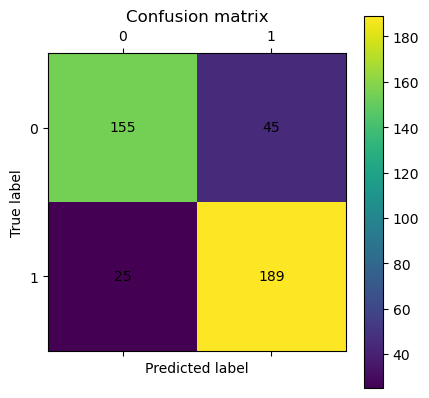

In [86]:
# visualize confusion matrix
plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
# include counts
for i in range(2):
    for j in range(2):
        plt.text(j, i, cm[i, j], ha='center', va='center', color='black')
plt.show()

The confusion matrix shows that:
- 155 of the below-average priced houses are classified correctly.
- 45 of the below-average priced houses are misclassified as above average.
- 189 of the above-average priced houses are classified correctly.
- 25 of the above-average priced houses are misclassified as below average.


## 5. Evaluation

The evaluation of the model is done by calculating the mean absolute error for the linear regression model and the accuracy score for the logistic regression model. The mean absolute error is calculated as the average of the absolute differences between the predicted and actual values. The accuracy score is calculated as the proportion of correct predictions to the total number of predictions. The confusion matrix is also used to visualize the performance of the logistic regression model.

#### Linear regression:
The mean absolute error of the linear regression model is 5.63. This means that, on average, the predicted house prices are off by 5.63 units from the actual house prices, which comes to about 56,300 TWD.

#### Logistic regression:
The accuracy score of the logistic regression model is 0.83. This means that the model correctly predicts the house price category (above or below the average of 37.98) 83% of the time.

Confusion matrix for logistic regression shows that the model predicted right 155 true positives and 189 true negatives. It also shows 45 false positives and 25 false negatives. This means that the model correctly predicted 155 instances as positive and 189 instances as negative, while it incorrectly predicted 45 instances as positive and 25 instances as negative.



In [82]:
from sklearn.metrics import mean_absolute_error
print("Mean absolute error: %.2f" % mean_absolute_error(y_test, y_pred))

Mean absolute error: 5.63


#### Feature importance

Feature importance can be calculated using the permutation importance method. This method calculates the importance of each feature by measuring the decrease in model performance when the values of that feature are randomly shuffled. The importance of each feature is then ranked based on the decrease in model performance.

The permutation importance in order:
1. X3 distance to the nearest MRT station
2. X5 latitude
3. X2 house age
4. X4 number of convenience stores
5. X1 transaction date
6. X6 longitude

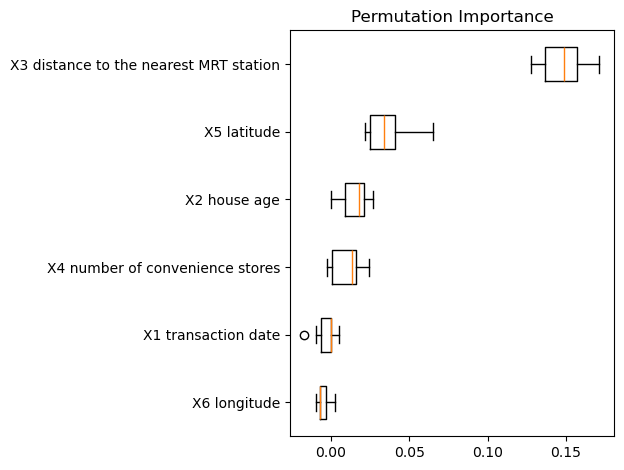

In [83]:
from sklearn.inspection import permutation_importance

result = permutation_importance(reg, X_scaled, y, n_repeats=10, scoring="accuracy", random_state=0, n_jobs=-1)
sorted_idx = result.importances_mean.argsort()

fig, ax = plt.subplots()
ax.boxplot(result.importances[sorted_idx].T, vert=False, tick_labels=X.columns[sorted_idx])
ax.set_title("Permutation Importance")
fig.tight_layout()
plt.show()


## 6. Deployment
The models could be deployed through a web application or API, allowing users to input property features and receive predictions. The Linear Regression model will predict continuous house prices, while the Logistic Regression model will classify properties as either above or below the average price.

Results can be communicated through performance reports and threshold-based alerts for large price changes.